[View in Colaboratory](https://colab.research.google.com/github/YaminiMuralidharen/MachineLearningexercises/blob/master/GaussianMixtureModel.ipynb)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [3]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture as GMM

#import data set

dataset = pd.read_csv('Mall_Customers.csv')
print(dataset.shape)
X = dataset.iloc[:,[2,4]].values

# to fill the missing values with NAN
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN',strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)
#print(X)


(200, 5)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


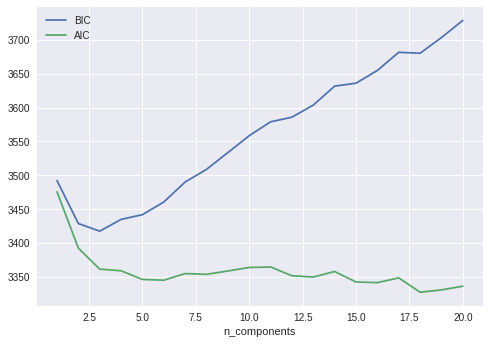

In [5]:
# to fit GMM to the data set
from sklearn.mixture import GaussianMixture as GMM

n_components = np.arange(1,21)
#Xnew = X[:]
models = [GMM(n,covariance_type ='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components,[m.bic(X) for m in models], label='BIC')
plt.plot(n_components,[m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
#plt.scatter(Xnew[:, 0], Xnew[:, 1]);
print(n_components)


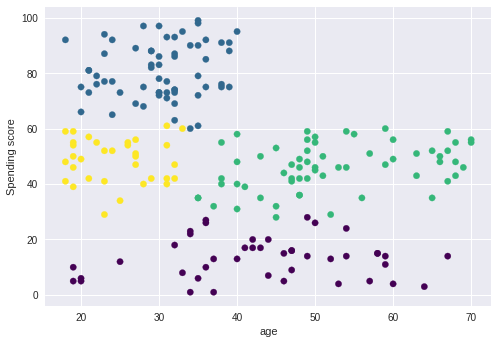

In [14]:
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
# CHART FOR showing clusters
plt.xlabel('age')
plt.ylabel('Spending score')
plt.scatter(X[:, 0], X[:, 1], c= labels, s = 40, cmap ='viridis')

**Story**

---



From the scatter plot, the mall can predict that people aged between 20 to 40 have the maximum spending score between 80 to 100.
So the mall should send promotional discounts to the people aged between 20 and 40
